In [1]:
from matplotlib import pyplot as plt
import numpy as np

dt = 0.01

In [2]:
def leapfrog(a, v, r, dt, kickstart = False):
    if kickstart:
        v12 = v + a*dt/2
        r = r + v12*dt
    else:
        v12 = v + a*dt
        r = r + v12*dt
    return r, v12
          
def acc(r1,r2,m,R,M):
    G = 4.49376*10**(-6)
    
    Fg = -G*m* (r1-r2)/(np.linalg.norm(r1-r2)**2 + 0.001**2)**(3/2)
    Fg -= G*M*(r1-R)/(np.linalg.norm(r1-R)**2 + 0.001**2)**(3/2)
    
    return Fg  

def E(v,r1,r2,m1,m2):
    G = 4.49376*10**(-6)
    return 1/2*m1*np.dot(v,v) + G * m1 * m2/(np.linalg.norm(r1-r2))

In [3]:
R = np.array([0,0])
r1 = np.array([12,0])
r2 = np.array([-12.2,0])

v1 = np.array([0,5])
v2 = np.array([0,-5])

M = 10**8
m1 = 10**5
m2 = 10**5

m = [m1,m2]

SDR1_l = [r1]
SDR2_l = [r2]
L1_l = [np.linalg.norm(np.cross(r1,m1*v1))]
L2_l = [np.linalg.norm(np.cross(r2,m2*v2))]
E1_l = [E(v1,r1,r2,m1,m2)]
E2_l = [E(v2,r2,r1,m2,m1)]
t = np.arange(0,20+dt,dt)
for i in t:
    force1 = acc(r1,r2,m2,R,M)
    force2 = acc(r2,r1,m1,R,M)
    
    if i == 0:
        r1,v1 = leapfrog(force1,v1,r1,dt, kickstart=True)
        r2,v2 = leapfrog(force2,v2,r2,dt, kickstart=True)
    else:
        r1,v1 = leapfrog(force1,v1,r1,dt)
        r2,v2 = leapfrog(force2,v2,r2,dt)  
    
    SDR1_l.append(r1)
    SDR2_l.append(r2)
    L1_l.append(np.linalg.norm(np.cross(r1,m1*v1)))
    L2_l.append(np.linalg.norm(np.cross(r2,m2*v2)))
    E1_l.append(E(v1,r1,r2,m1,m2))
    E2_l.append(E(v2,r2,r1,m2,m1))

In [4]:
R = np.array([0,0])
r1 = np.array([12,0])
r2 = np.array([-12.2,0])

v1 = np.array([0,5])
v2 = np.array([0,-5])

M = 10**8
m1 = 10**5
m2 = 10**5

m = [m1,m2]

SDR1_rk4 = [r1]
SDR2_rk4 = [r2]
L1_rk4 = [np.linalg.norm(np.cross(r1,m1*v1))]
L2_rk4 = [np.linalg.norm(np.cross(r2,m2*v2))]
E1_rk4 = [E(v1,r1,r2,m1,m2)]
E2_rk4 = [E(v2,r2,r1,m2,m1)]
t = np.arange(0,20+dt,dt)
for i in t:
    a11 = acc(r1,r2,m2,R,M)
    a21 = acc(r2,r1,m1,R,M)
    
    v12 = v1 + 1/2*dt*a11
    v22 = v2 + 1/2*dt*a21
    
    r12 = r1 + 1/2 * dt * v12
    r22 = r2 + 1/2 * dt * v22
    
    a12 = acc(r12,r22,m2,R,M)
    a22 = acc(r22,r12,m1,R,M)
    
    v13 = v1 + 1/2*dt*a12
    v23 = v2 + 1/2*dt*a22
    
    r13 = r1 + 1/2 * dt * v13
    r23 = r2 + 1/2 * dt * v23
    
    a13 = acc(r13,r23,m2,R,M)
    a23 = acc(r23,r13,m1,R,M)
    
    v14 = v1 + dt*a13
    v24 = v2 + dt*a23
    
    r14 = r1 + dt * v14
    r24 = r2 + dt * v24
    
    a14 = acc(r14,r24,m2,R,M)
    a24 = acc(r24,r14,m1,R,M)
    
    v1 = v1 + 1/6*dt*(a11 + 2*a12 + 2*a13 + a14)
    v2 = v2 + 1/6*dt*(a21 + 2*a22 + 2*a23 + a24)
    
    r1 = r1 + 1/6*dt*(v1 + 2*v12 + 2*v13 + v14)
    r2 = r2 + 1/6*dt*(v2 + 2*v22 + 2*v23 + v24)
    
    SDR1_rk4.append(r1)
    SDR2_rk4.append(r2)
    L1_rk4.append(np.linalg.norm(np.cross(r1,m1*v1)))
    L2_rk4.append(np.linalg.norm(np.cross(r2,m2*v2)))
    E1_rk4.append(E(v1,r1,r2,m1,m2))
    E2_rk4.append(E(v2,r2,r1,m2,m1))

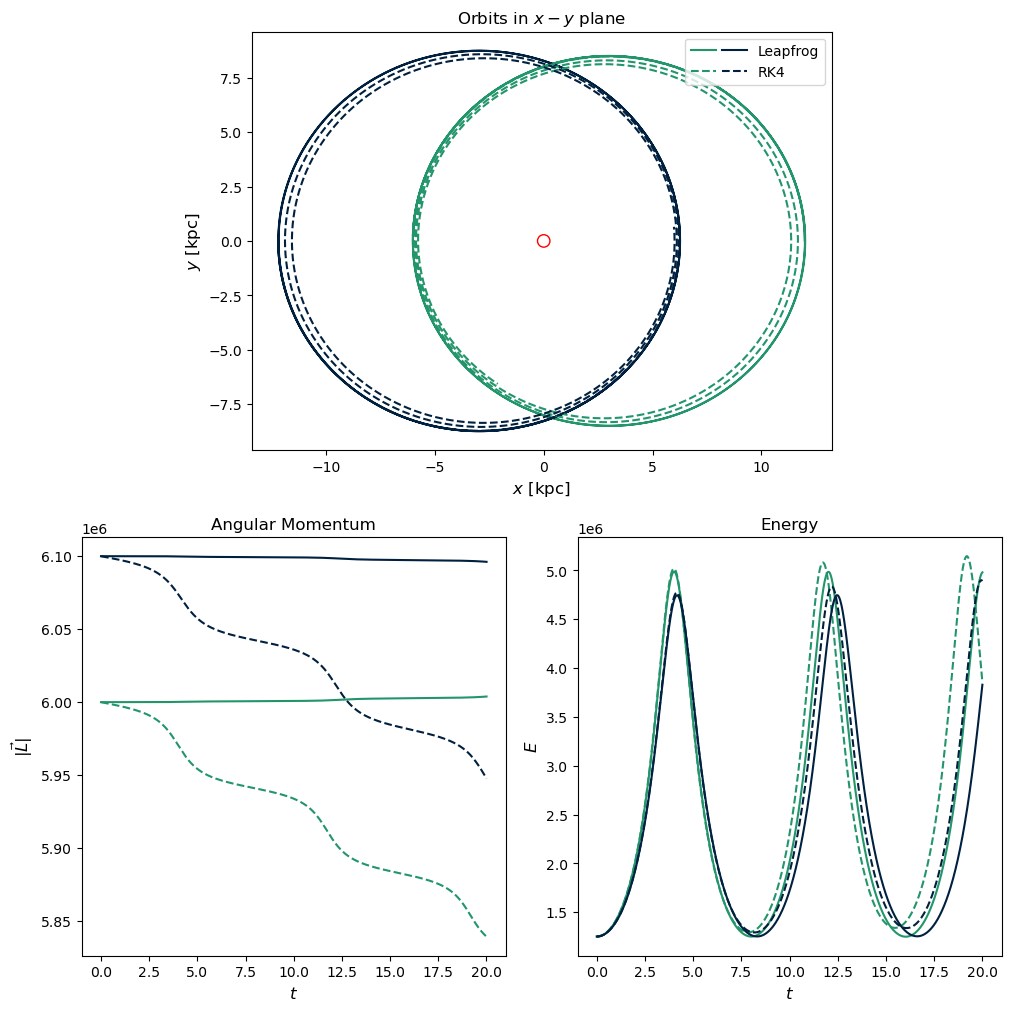

In [10]:
from matplotlib import gridspec
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

#c = [(.224, 1, .078 , 1), 'cyan']
c = [(0, 32/256, 63/256, 1), (34/256, 150/256, 107/256, 1)]

#plt.style.use('dark_background')
plt.style.use('default')
#fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0,:], aspect='equal')
ax2 = fig.add_subplot(spec[1,0])
ax3 = fig.add_subplot(spec[1,1])

ax1.set_title(r"Orbits in $x-y$ plane")
#ax1.axis('off')
ax1.set_xlabel(r"$x$ [kpc]", fontsize=12)
ax1.set_ylabel(r"$y$ [kpc]", fontsize=12)

p00, = ax1.plot([SDR1_l[i][0] for i in range(len(t))],[SDR1_l[i][1] for i in range(len(t))],color=c[1])
p01, = ax1.plot([SDR2_l[i][0] for i in range(len(t))],[SDR2_l[i][1] for i in range(len(t))],color=c[0])
p10, = ax1.plot([SDR1_rk4[i][0] for i in range(len(t))],[SDR1_rk4[i][1] for i in range(len(t))],linestyle='--',color=c[1])
p11, = ax1.plot([SDR2_rk4[i][0] for i in range(len(t))],[SDR2_rk4[i][1] for i in range(len(t))],linestyle='--',color=c[0])
ax1.scatter(0, 0, s=80, facecolors='none', edgecolors='r')
l = ax1.legend([(p00, p01), (p10, p11)], ["Leapfrog", "RK4"], loc=1, numpoints=1, handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None)})


ax2.set_title("Angular Momentum")
ax2.plot(t,L1_l[:-1],color=c[1])
ax2.plot(t,L1_rk4[:-1],linestyle='--',color=c[1])
ax2.plot(t,L2_l[:-1],color=c[0])
ax2.plot(t,L2_rk4[:-1],linestyle='--',color=c[0])
ax2.set_xlabel(r"$t$", fontsize=12)
ax2.set_ylabel(r"$\left|\vec{L}\right|$", fontsize=12)

ax3.set_title("Energy")
ax3.plot(t,E1_l[:-1],color=c[1])
ax3.plot(t,E1_rk4[:-1],linestyle='--',color=c[1])
ax3.plot(t,E2_l[:-1],color=c[0])
ax3.plot(t,E2_rk4[:-1],linestyle='--',color=c[0])
ax3.set_xlabel(r"$t$", fontsize=12)
ax3.set_ylabel(r"$E$", fontsize=12)

#plt.show()
fig.savefig("Leapfrog_vs_RK4.pdf", dpi=fig.dpi, bbox_inches=fig.get_tightbbox(fig.canvas.get_renderer()))